# **Exploratory Data Analysis : Haberman's Survival**

---



---



#### **About** : The dataset contains cases from a study on the survival of patients who had undergone surgery for breast cancer.

#### **Features:**
There are 4 attributes, out of which 3 are features and the one is class attribute. There are 306 datapoints. 
* **age** - Age of the patient during operation
* **year** - Patient's year of operation
* **nodes** - No of nodes axillary nodes found
* **status** - Survival status
   * 1 ---> Patient survived for 5 years or longer after operation!
   * 2 ---> Patient died with in 5 years !

#### **Domain Knowledge** :
* Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading. 
  
  Source - https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes

* The more lymph nodes that contain cancer cells, the more serious the cancer might be.

#### **Objective** : 
  To predict the survival chances of patients who had undergone breast surgery.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
haberman = pd.read_csv('/content/haberman.csv')
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
print(haberman.shape)

(306, 4)


In [ ]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#Observation

* There are no missing values in the dataset.

#Bivariate Analysis

## Pair Plot

Text(0.5, 1.0, 'Pairplot for Haberman survival data analysis')

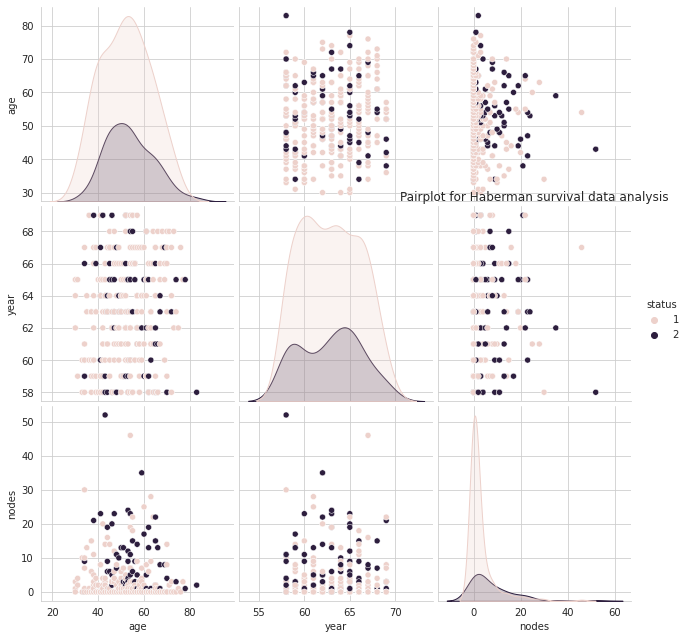

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status',size=3)
plt.title('Pairplot for Haberman survival data analysis')

#Observation
* As we can see, we are unable to classify which is the most useful feature because of too much overlapping.
* Hence this pair plot is not much informative.

## Scatter Plot

#### 1-D scatter plot

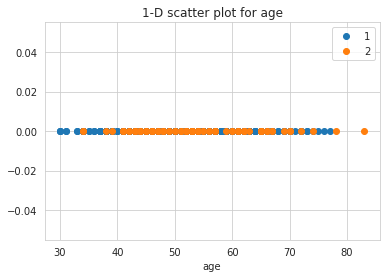

In [ ]:
survive = haberman.loc[haberman['status'] == 1]
non_survive = haberman.loc[haberman['status'] == 2]

plt.plot(survive['age'], np.zeros_like(survive['age']), 'o',label='1')
plt.plot(non_survive['age'], np.zeros_like(non_survive['age']), 'o', label='2')
plt.title('1-D scatter plot for age')
plt.xlabel('age')
plt.legend()
plt.show()

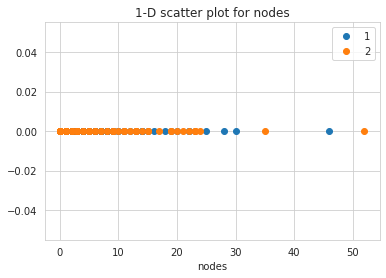

In [ ]:
survive = haberman.loc[haberman['status'] == 1]
non_survive = haberman.loc[haberman['status'] == 2]

plt.plot(survive['nodes'], np.zeros_like(survive['nodes']), 'o',label = '1')
plt.plot(non_survive['nodes'], np.zeros_like(non_survive['nodes']), 'o', label = '2')
plt.title('1-D scatter plot for nodes')
plt.xlabel('nodes')
plt.legend()
plt.show()

#Observation 
* We can easily count the number of points of survivals and non-survivals . 
* Most of the patients died whose age was between 41-70 age.
* The 1-D scatter plot for nodes is having very imbalanced data, so we cannot classify.

#### 2-D scatter plot

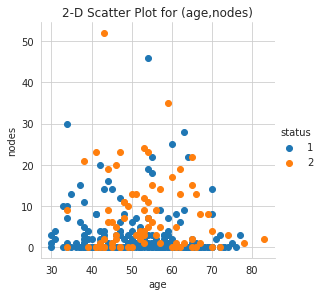

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 4) \
   .map(plt.scatter,'age','nodes') \
   .add_legend()
plt.title('2-D Scatter Plot for (age,nodes)')
plt.show()

#Observation
* Between range of 0-5 nodes on y axis, survival percentage is more than death percentage.

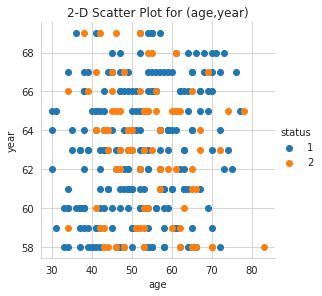

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 4) \
   .map(plt.scatter,'age','year') \
   .add_legend()
plt.title('2-D Scatter Plot for (age,year)')
plt.show()

#Observation
* Here in 2-d scatter plot of (age,year), we are unable to classify as age and year are not linearly separable.

#Univariate Analysis(PDF, CDF, Box-plots, ViolinPlots)

## PDF(Probability Density Function)

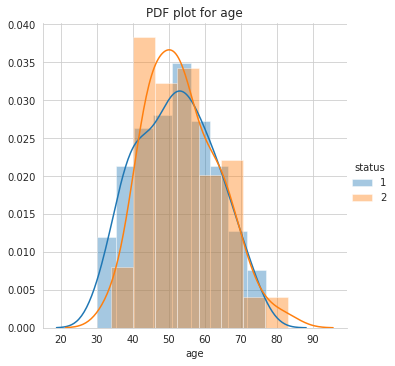

In [ ]:
sns.FacetGrid(haberman, hue = 'status', size = 5) \
   .map(sns.distplot,'age') \
   .add_legend()
plt.title('PDF plot for age')
plt.show()

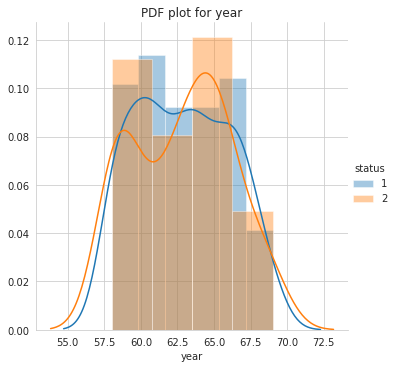

In [ ]:
sns.FacetGrid(haberman, hue = 'status', size = 5) \
   .map(sns.distplot,'year') \
   .add_legend()
plt.title('PDF plot for year')
plt.show()

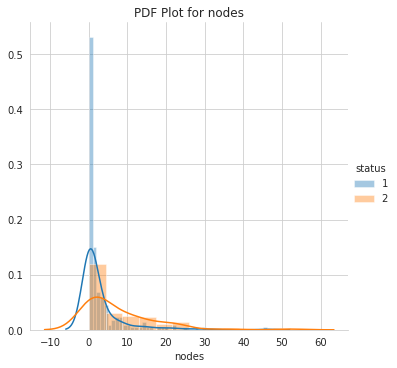

In [ ]:
sns.FacetGrid(haberman, hue = 'status', size = 5) \
   .map(sns.distplot,'nodes') \
   .add_legend()
plt.title('PDF Plot for nodes')
plt.show()

#Observation
* In PDF plot of nodes, probably 54% people survived .
* In all the plots, features are overlapping massively, so it is difficult to analyse.

## CDF(Cumulutive Density Function)

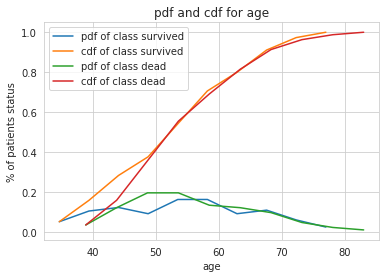

In [ ]:
survived = haberman.loc[haberman['status'] == 1]
dead = haberman.loc[haberman['status'] == 2]
labels = ['pdf of class survived','cdf of class survived','pdf of class dead','cdf of class dead']

counts, bin_edges = np.histogram(survived['age'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('pdf and cdf for age')
plt.xlabel('age')
plt.ylabel('% of patients status')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(dead['age'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(labels)

#Observation for pdf and cdf of age:
* 15% of the survived patients belongs to age group of equal to less than 38.

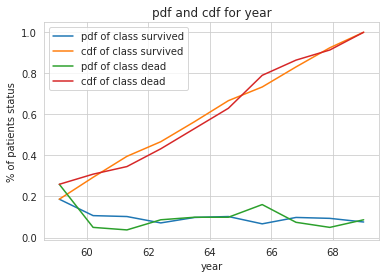

In [ ]:
counts, bin_edges = np.histogram(survived['year'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('pdf and cdf for year')
plt.xlabel('year')
plt.ylabel('% of patients status')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(dead['year'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(labels)

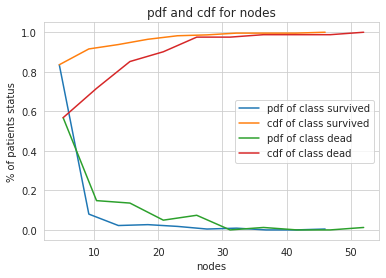

In [ ]:
counts, bin_edges = np.histogram(survived['nodes'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('pdf and cdf for nodes')
plt.xlabel('nodes')
plt.ylabel('% of patients status')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(dead['nodes'], bins = 10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(labels)

#Observation of pdf and cdf for nodes:
* patients having more than 46 nodes could not survive .

## Box Plots

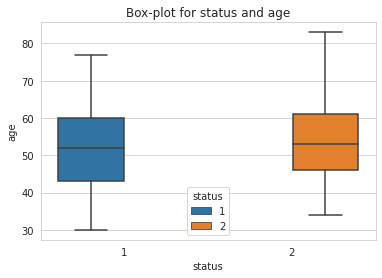

In [ ]:
sns.boxplot(x = 'status', y = 'age', hue = 'status', data = haberman)
plt.title('Box-plot for status and age')
plt.show()

#Observation for boxplot of status and age:
* I think age can't help us to classify our target variable as patients did survive with in age group of 43-60 while patients died also with in age group of 47-61.

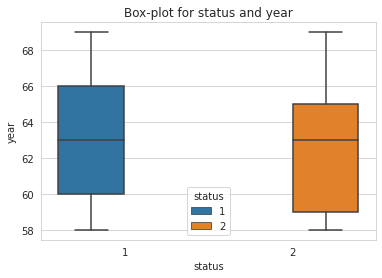

In [ ]:
sns.boxplot(x = 'status', y = 'year', hue = 'status', data = haberman)
plt.title('Box-plot for status and year')
plt.show()

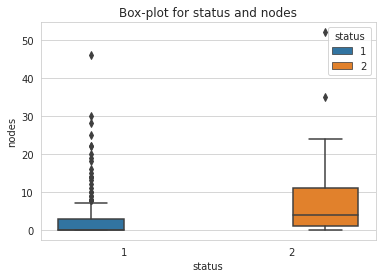

In [ ]:
sns.boxplot(x = 'status', y = 'nodes', hue = 'status', data = haberman)
plt.title('Box-plot for status and nodes')
plt.show()

#Observation for boxplot of status and nodes:
* Yes , nodes is giving some intuition, it can somehow help to classify.

## Violin Plots

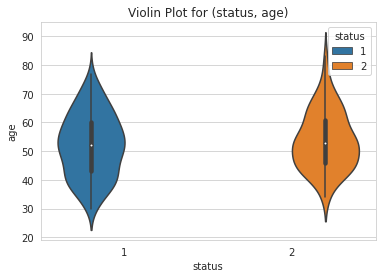

In [ ]:
sns.violinplot(x = 'status', y = 'age', data = haberman, hue = 'status', size = 5)
plt.title('Violin Plot for (status, age)')
plt.show()

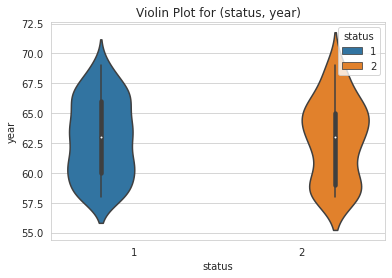

In [ ]:
sns.violinplot(x = 'status', y = 'year', data = haberman, size = 5, hue = 'status')
plt.title('Violin Plot for (status, year)')
plt.show()

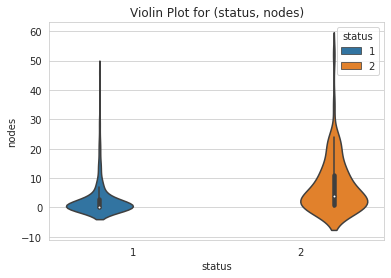

In [ ]:
sns.violinplot(x = 'status', y = 'nodes', data = haberman, size = 5,hue = 'status')
plt.title('Violin Plot for (status, nodes)')
plt.show()

#Observation:
* Out of the three features, violinplot of status, nodes is having significant distinct plot which can help us to classify our target variable.
* For the violin plot of survived patients (1), the centre is at 0 and (3rd Quartile -2nd Quartile) is the most densed area and dark in the violin plot .

#Multivariate Probability density, Contour Plot

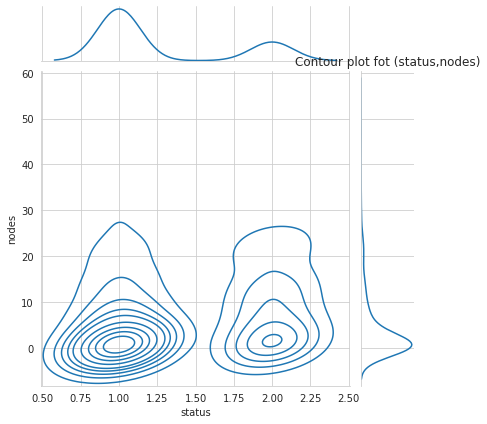

In [ ]:
sns.jointplot(x = 'status', y = 'nodes', data = haberman, kind = 'kde')
plt.title('Contour plot fot (status,nodes)')
plt.show()

#Conclusion
* The data is quite imbalanced as it does not contain equal no of points from both the classes of our target variable.
* There is massive overlapping with in the data points , so it is very difficult to classify.
* However no of nodes is playing an important role.
* if the number of nodes is less than probability of survival of patient is more.
* Ofcourse we need some more good features to come on a very good conclusion.